In [1]:
# project setup
using Pkg;Pkg.activate(localprojectdir())
ENV["JULIA_DEBUG"] = ""

""

# Convergence stagnation

In [2]:
using BSplineExtension, Plots, LaTeXStrings, LinearAlgebra

┌ Info: Recompiling stale cache file /Users/vincentcp/.julia/compiled/v1.1/BSplineExtension/6Y8mR.ji for BSplineExtension [0b21e58f-1780-5391-9880-11ae5a9ef91b]
└ @ Base loading.jl:1184


Approximate $$f(x)=\cos(100\pi x)$$ using two bases: 
- one consisting of compact B-splines (red) 
- one with Gaussians similar to B-splines (blue)

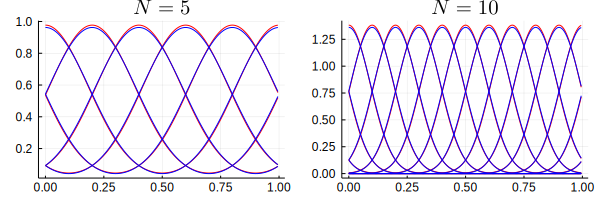

In [4]:
f = x->cos(100pi*x)
Ps = (d)->(GaussSplinePlatform(d),BSplinePlatform(d))
P1, P2 = Ps(9)
N = 5
plot(dictionary(P1,N);c="red",layout=2,subplot=1,size=(600,200),legend=false,title=L"N=5")
plot!(dictionary(P2,N);c="blue",layout=2,subplot=1)
N = 10
plot!(dictionary(P1,N),c="red",subplot=2,legend=false,title=L"N=10")
plot!(dictionary(P2,N),c="blue",subplot=2)

#### Interpolation ($M=N$)

Use B-splines of order 5 (left) and of order 9 (right) to approximate $f$ in $[0,1]$ with varying $N$. Convergence goes algebraically down to machine precision for B-splines and reaches a plateau for Gaussians similar to B-splines.

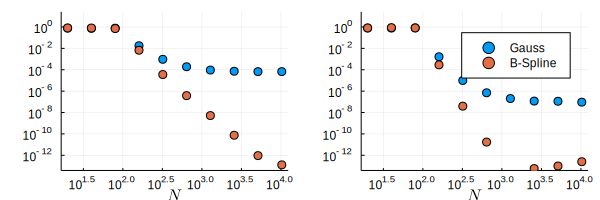

In [9]:
Ns = 10*[1<<k for k in 1:10]
err1 = [abserror(f, Fun(f,P,N)) for N in   Ns, P in Ps(5)]
err2 = [abserror(f, Fun(f,P,N)) for N in   Ns, P in Ps(9)]
scatter(Ns,err1,yscale=:log10,xscale=:log10;layout=2,subplot=1,ylims=[1e-13,10],
    legend=false,size=(600,200),xlabel=L"N")
scatter!(Ns,err2,yscale=:log10,xscale=:log10;layout=2,
    subplot=2,ylims=[1e-13,10],label=["Gauss","B-Spline"],xlabel=L"N")

In [9]:
using FrameFun
Ps = (d)->(GaussSplinePlatform(d),
    BSplinePlatform(d),
    SumPlatform(GaussSplinePlatform(d), BSplinePlatform(),k->(k,k))
)

#23 (generic function with 1 method)

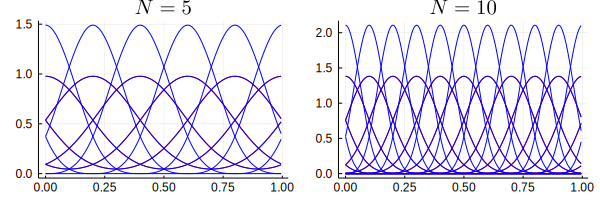

In [10]:
P1, P2, P3 = Ps(9)
N = 5
plot(dictionary(P1,N);c="red",layout=2,subplot=1,size=(600,200),legend=false,title=L"N=5")
plot!(dictionary(P3,N);c="blue",layout=2,subplot=1)
N = 10
plot!(dictionary(P1,N),c="red",subplot=2,legend=false,title=L"N=10")
plot!(dictionary(P3,N),c="blue",subplot=2)

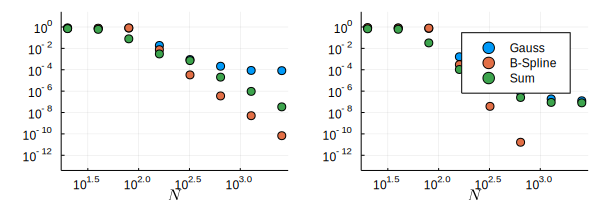

In [16]:
Ns = 10*[1<<k for k in 1:8]
err1 = [abserror(f, Fun(f,P,N;solverstyle=DirectStyle())) for N in   Ns, P in Ps(5)]
err2 = [abserror(f, Fun(f,P,N;solverstyle=DirectStyle())) for N in   Ns, P in Ps(9)]
scatter(Ns,err1,yscale=:log10,xscale=:log10;layout=2,subplot=1,ylims=[1e-13,10],
    legend=false,size=(600,200),xlabel=L"N")
scatter!(Ns,err2,yscale=:log10,xscale=:log10;layout=2,
    subplot=2,ylims=[1e-13,10],label=["Gauss","B-Spline","Sum"],xlabel=L"N")